In [161]:
import numpy as np
from pylab import plot, show

In [4]:
def max_exp(D):
    EP = np.array([(4*d-1)*((5/6)**d) + 1 for d in range(1,D+1)])
    return np.argmax(EP)

In [5]:
max_exp(20)

5

In [19]:
for k in range(2,7):
    print(k)

2
3
4
5
6


In [51]:
np.arange(2*10,6*10+1).shape

(41,)

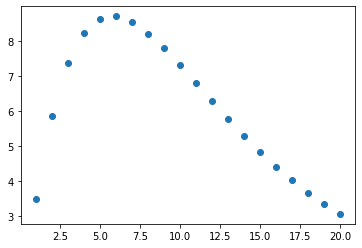

In [18]:
x = np.arange(20)+1
y = max_exp(20)
plot(x,y,'o')

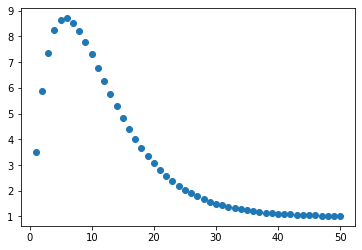

In [20]:
x = np.arange(50)+1
y = max_exp(50)
plot(x,y,'o')

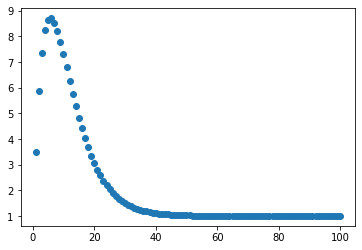

In [21]:
x = np.arange(100)+1
y = max_exp(100)
plot(x,y,'o')

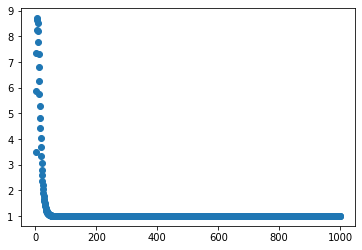

In [22]:
x = np.arange(1000)+1
y = max_exp(1000)
plot(x,y,'o')

In [89]:
import random
import numpy as np
N = 100
def Q(d,k):
    if d == 1:
        return 1/5
    if k < 2*d or k > 6*d:
        return 0
    else:
        return 1/5*sum([Q(d-1,k-j) for j in range(2,7)])
def probabilities(D):
    K = np.arange(2,6*D+1)
    values_D = np.arange(1,D+1)
    P = np.zeros([D,6*D])
    P[:,0] = list(map(lambda d : 1 - (5/6)**d, values_D))
    for d in range(P.shape[0]):
        for k in range(1,P.shape[1]):
            if k+1 > 6*(d+1) or (k+1 >= 2 and k+1 <= 2*(d+1)-1):
                P[d,k] = 0
            else:
                P[d,k] = Q(d+1,k+1)*(5/6)**(d+1)
    return P


In [90]:
P = probabilities(5)

In [91]:
P

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.30555556, 0.        , 0.        , 0.13888889, 0.13888889,
        0.13888889, 0.13888889, 0.13888889, 0.13888889, 0.13888889,
        0.13888889, 0.13888889, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.4212963 , 0.        , 0.        , 0.        , 0.        ,
        0.02314815, 0.0462963 , 0.06944444, 0.09259259, 0.11574074,
        0.11574074, 0.11574074, 0.11574074, 0.

In [33]:
d[:,0]

array([ 3, 10, 34,  3])

In [32]:
d

array([[ 3,  5,  2],
       [10, 23, 12],
       [34, 23, 18],
       [ 3,  1,  2]])

In [34]:
x = lambda d : 1 - (5/6)**d

In [41]:
from functools import reduce
D = [1,2,3,4,5,6,7,8,9,10]
squared = list(map(lambda d : 1 - (5/6)**d, D))

In [45]:
P[:,0] = squared

In [47]:
print(P)

[[0.16666667 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.30555556 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.4212963  0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.       

In [49]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [151]:
from random import randrange


def get_dice_rolls(number_of_rolls):
    """Returns list with number_of_rolls from a 6-sided dice."""

    return [randrange(1, 6+1) for _ in range(number_of_rolls)]


def get_single_dice_face(dice_roll, zero_based=False, eye='o '):
    """Return the full face of the roll for a dice-size sided dice."""

    # Shorten roll variable, and account for zero_basing rolls
    r = dice_roll if zero_based else dice_roll - 1
    dice_str = '+-----+\n| {0} {1} |\n| {2}'.format(eye[r<1], eye[r<3], eye[r<5])
    # Return mirrored dice string with changing middle to get a full face
    return dice_str + eye[r&1] + dice_str[::-1]


def print_dice_rolls(dice_rolls, zero_based=False,  max_width=72, eye='o '):
    """Pretty print all dice_rolls using 6-sided dice(s)."""

    # Verify parameters
    
    if any(roll > 6 for roll in dice_rolls):
        raise ValueError('Roll is higher than dice size')

    if len(eye) != 2:
        raise ValueError('Excpected two choice for eye parameter')

    # Set up some default values
    dice_width = 5
    dice_lines = 5

    # Will try to collate output of multiple dice rolls into lines
    # of up to max_width length
    output_buffer = [''] * dice_lines

    # Output the dice rolls using output_buffer
    for roll in dice_rolls:

        # Build a proper dice_str according to 6 and roll
        current_dice = get_single_dice_face(roll, zero_based, eye)

        # Check width of output_buffer against max_width,
        # and if next line go over, then print and reset buffer
        if len(output_buffer[0]) + dice_width >= 72:
            for idx, line in enumerate(output_buffer):
                print(line)
                output_buffer[idx] = ''

        # Append dice to output_buffer
        for idx, line in enumerate(current_dice.split('\n')):
            output_buffer[idx] += line + '  '


    # Print remaining dices in output_buffer
    if len(output_buffer[0]) > 0:
        for line in output_buffer:
            print(line)


In [158]:
import random
import numpy as np
import argparse
import print_dice as dc



def Q(d,k):
    if d == 1:
        return 1/5
    if k < 2*d or k > 6*d:
        return 0
    else:
        return 1/5*sum([Q(d-1,k-j) for j in range(2,7)])

def probabilities(D):
    K = np.arange(2,6*D+1)
    values_D = np.arange(1,D+1)
    P = np.zeros([D,6*D])
    P[:,0] = list(map(lambda d : 1 - (5/6)**d, values_D))
    for d in range(P.shape[0]):
        for k in range(1,P.shape[1]):
            if k+1 > 6*(d+1) or (k+1 >= 2 and k+1 <= 2*(d+1)-1):
                P[d,k] = 0
            else:
                P[d,k] = Q(d+1,k+1)*(5/6)**(d+1)
    return P

def roll_dice():
    return random.randint(1,6)

def player_roll(d,draw):
    counter = 0
    dices = []
    dice_1 = False
    for i in range(d):
        dice = roll_dice()
        dices.append(dice)
        if dice == 1 :
            dice_1 = True
    """print("Faces obtenues : \n")"""
    if draw:
        print_dice_rolls(dices)
    if dice_1 is True:
        counter = 1
    else :
        counter = sum(dices)
    return counter

def random_strategy(D):
    return random.randint(1,D)

def blind_strategy(D):
    expected = np.array([(4*d-1)*((5/6)**d) + 1 for d in range(1,D+1)])
    return np.argmax(expected)

def optimal_strategy(state):
    pass


def play(strategy1, strategy2, win_score = 100, number_dice = 10, draw=False): #nécessite des modifications pour la variante simultanée
    score_player1 = 0
    score_player2 = 0
    nb_turns = 1
    while score_player1 < win_score or score_player2 < win_score :
    
        d1 = strategy1(number_dice)
        score1 = player_roll(d1,draw)
        score_player1 += score1

        if score_player1 >= win_score:
            winner = 1
            break

        
        d2 = strategy2(number_dice)
        score2 = player_roll(d2,draw)
        score_player2 += score2

        if score_player2 >= win_score:
            winner = 2
            break
        nb_turns += 1
    return winner

def expected_rewards(strategy1,strategy2, nb_games,N): #nécessite des modifications pour la variante simultanée
    rewards = np.zeros(N)
    for n in range(N):
        for i in range(nb_games):
            win = play(strategy1,strategy2,win_score = n+20)
            if win == 1:
                rewards[n] += 1
            else:
                rewards[n] += -1
        rewards[n] = rewards[n]/nb_games
    return np.arange(20,N+20), rewards


In [ ]:
N, r = expected_rewards(blind_strategy,random_strategy,1000,300)

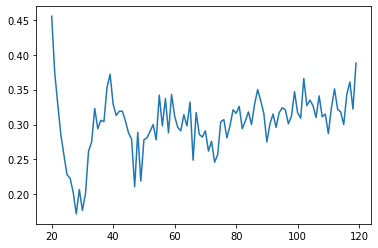

In [164]:
plot(N,r)